In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

%matplotlib inline
torch.set_printoptions(linewidth=120)

## Preparing data using PyTorch
1. Extract - download and read the `Fashion-MNIST` dataset
2. Transform - put the data into `tensors`
3. Load - construct the data into an object to make i/o flexible and robust

In [2]:
# Below is an example class in python to extend inbuilt PyTorch dataset class. 
# This is what a dataloader looks like behind the scenes

"""
class OHLC(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv(file))
    
    def __getitem__(self, index):
        r = self.data.iloc[index]
        label = torch.tensor(r.is_up_day, dtype=torch.long)
        sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
        return sample, label
    
    def __len__(self):
        return len(self.data)
""";

### 1. Extract dataset from torchvision
`train_set` is an instance of the FashionMNIST class from torchvision

In [4]:
train_set = torchvision.datasets.\
                FashionMNIST(root='../data/FashionMNIST',
                             train=True,
                             download=True,
                             transform=transforms.Compose([transforms.ToTensor()]))

`train_loader` is an instance of the `DataLoader` utility can be used to control 
* batch-size
* thread management
* shuffle capabilities

In [5]:
train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=10)

len(train_loader)

6000

In [8]:
# Labels 0-9
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### Accessing a Sample

In [10]:
# train_set returns a tuple
sample = next(iter(train_set))
len(sample)

2

Label: tensor(9)


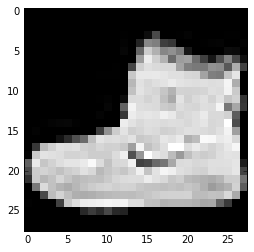

In [11]:
image, label = sample
plt.imshow(image.squeeze(), cmap='gray', interpolation="nearest")
print('Label:', label)

### Batches and Dataloaders
* The `dataloader` object for the batch is almost identical to that of a single sample

In [15]:
# train_loader returns a list of length 2
batch = next(iter(train_loader))

In [16]:
batch[0].shape

torch.Size([10, 1, 28, 28])

In [17]:
batch[1]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [18]:
images, labels = batch

### Plotting Samples with `Matplotlib`
* The slow and bad way to plot images

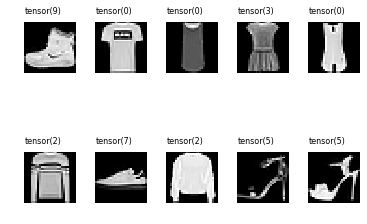

In [19]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(batch[0])):
    image = batch[0][i]
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_axis_off()
    ax.text(0, -5, str(batch[1][i]), fontsize=8, ha='left')
    ax = plt.imshow(image.squeeze(), cmap='gray', interpolation="nearest")


### Plotting with `TorchVision`
* Make use of the built in `make_grid` utility

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


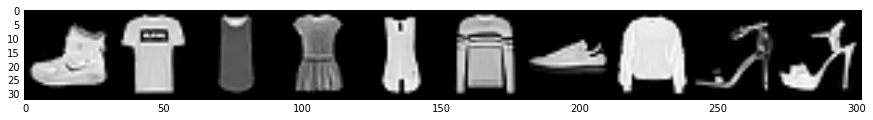

In [20]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [21]:
# Label maps
labels_map = {0 : '0. T-Shirt',
              1 : '1. Trouser',
              2 : '2. Pullover',
              3 : '3. Dress',
              4 : '4. Coat',
              5 : '5. Sandal',
              6 : '6. Shirt',
              7 : '7. Sneaker',
              8 : '8. Bag',
              9 : '9. Ankle Boot'};

In [38]:
labels_map[labels[1].data.tolist()]

'0. T-Shirt'

## Building the Model with Pytorch's `torch.nn` Framework
1. Extend the `nn.Module` base class.
2. Define layers as class attributes.
3. Implement the `forward()` method.

In [86]:
import torch.nn as nn

In [100]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, x):
        return out
    
# tbc

In [99]:
# PREVIOUS CNN (to remove)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Create instance
cnn = CNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward pass, backprop and optimisation
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0])    
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d, Loss: %.4f' % 
                   (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

RuntimeError: size mismatch, m1: [10 x 4800], m2: [60 x 10] at c:\programdata\miniconda3\conda-bld\pytorch_1533086652614\work\aten\src\th\generic/THTensorMath.cpp:2070

In [99]:
losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward pass, backprop and optimisation
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0])    
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d, Loss: %.4f' % 
                   (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

RuntimeError: size mismatch, m1: [10 x 4800], m2: [60 x 10] at c:\programdata\miniconda3\conda-bld\pytorch_1533086652614\work\aten\src\th\generic/THTensorMath.cpp:2070